<!--#  ML Campus Batch Aug 2022 - Bangalore
### Assignment 2 --> 
# Convolutional Neural Network 
<!--
###### submitted by: Neeraj Ganji 
###### submitted on: 5th sep 2022

ID: 23133
-->

#### Importing all the required Libraries

In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


#### Importing the training dataset and test dataset


In [118]:
from keras.datasets import fashion_mnist
# load dataset
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


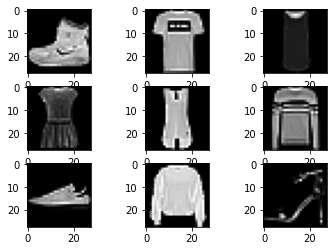

In [119]:
x_train = tf.image.adjust_gamma(x_train,2) #quadratic intensity scaling
x_train = np.array(x_train)

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### PART - 1 : DATA AUGMENTATION

In [120]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40,width_shift_range=0.25 ,height_shift_range=0.25 ,zoom_range=[0.5,1.5] ,shear_range= 45
)

In [121]:
x_train=x_train.reshape((60000,28,28,1))
x_train[0].shape

(28, 28, 1)

In [122]:
l=[]
for i in x_train[:2000]:
  j=0
  i = i.reshape((1,) + i.shape)
  for _ in generator.flow(i, batch_size = 1, save_to_dir = 'fashion1', save_prefix ='image', save_format = 'png'):
    j+=1
    if j > 4:
      break
  for a in os.listdir('fashion1'):
    img = Image.open('fashion1/'+a)
    im = np.asarray(img)
    im = im.reshape((1,28,28,1))
    x_train = np.append(x_train, im)
  for a in os.listdir('fashion1'):
    os.remove('fashion1/'+a)


In [123]:
l=[]
for i in y_train:
  l.append(i)

In [124]:
for i in range(0,2000,1):
  for j in range(5):
    l.append(y_train[i])


In [125]:
l=np.array(l)

### PART 2 : BUILDING A CNN MODEL

In [126]:
CNN=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])



In [127]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [129]:
CNN.fit(x_train.reshape((69996,28,28))/255,l[:69996],epochs=10)

Epoch 1/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.6405 - accuracy: 0.7798
Epoch 2/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.4757 - accuracy: 0.8347
Epoch 3/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.3856 - accuracy: 0.8666
Epoch 4/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.2868 - accuracy: 0.8996
Epoch 5/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.1812 - accuracy: 0.9367
Epoch 6/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.1133 - accuracy: 0.9611
Epoch 7/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.0771 - accuracy: 0.9742
Epoch 8/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.0611 - accuracy: 0.9796
Epoch 9/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.0487 - accuracy: 0.9843
Epoch 10/10
2188/2188 [==============================] - 13s 6ms/step - l

In [130]:
CNN.evaluate(x_test / 255,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6227 - accuracy: 0.9078


[0.6227326393127441, 0.907800018787384]

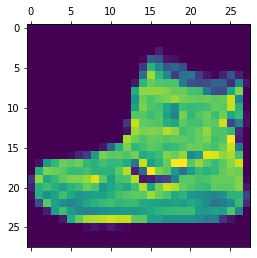

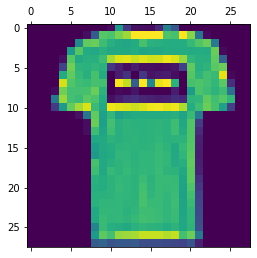

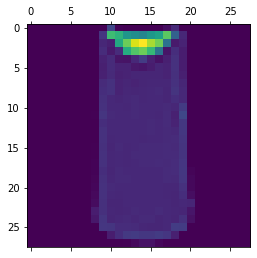

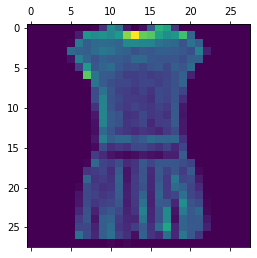

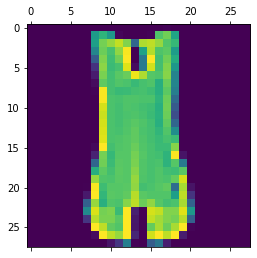

In [132]:
for i in range(5):
  plt.matshow(x_train.reshape(69996,28,28)[i])

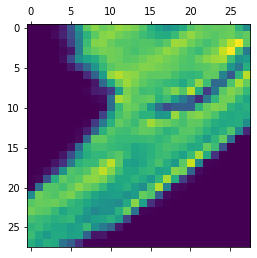

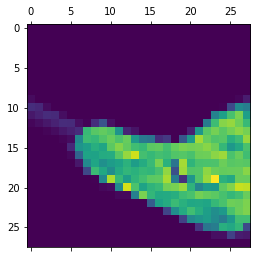

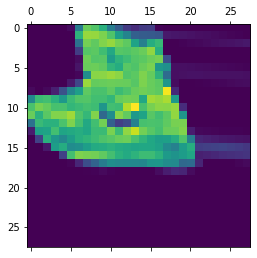

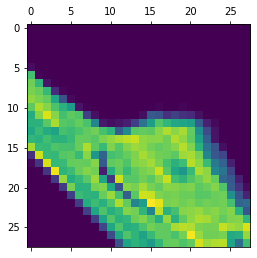

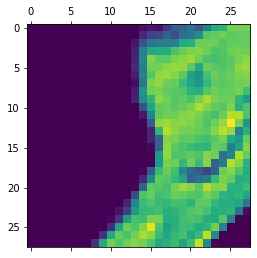

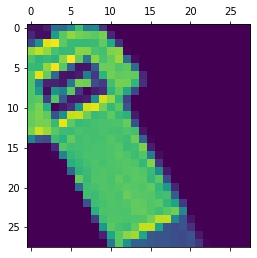

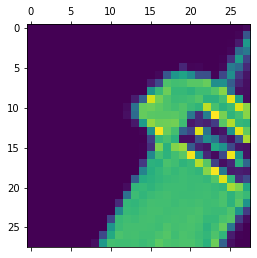

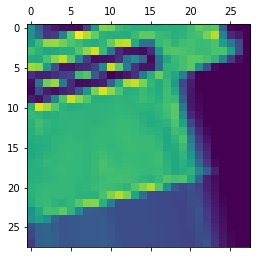

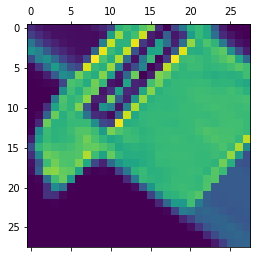

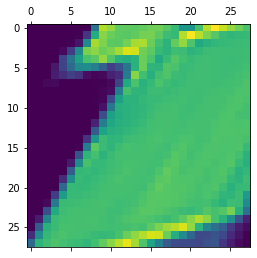

In [134]:
for i in range(10):
  plt.matshow(x_train.reshape(69996,28,28)[i+60000])

### PART - 3 : MODIFIED CNN MODEL USING DROPOUT AND BATCHNORMALIZTION

In [140]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.2, patience=5 , mode='min' ,min_lr=0.001 )

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5,mode='min')

CNN=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [141]:
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
CNN.fit(x_train.reshape((69996,28,28))/255,l[:69996],epochs=10,callbacks=[reduce_lr,callback])

Epoch 1/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.8332 - accuracy: 0.7197 - lr: 0.0010
Epoch 2/10
2188/2188 [==============================] - 12s 5ms/step - loss: 0.6587 - accuracy: 0.7735 - lr: 0.0010
Epoch 3/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.6089 - accuracy: 0.7911 - lr: 0.0010
Epoch 4/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.5836 - accuracy: 0.8002 - lr: 0.0010
Epoch 5/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.5584 - accuracy: 0.8075 - lr: 0.0010
Epoch 6/10
2188/2188 [==============================] - 12s 6ms/step - loss: 0.5338 - accuracy: 0.8165 - lr: 0.0010
Epoch 7/10
2188/2188 [==============================] - 12s 6ms/step - loss: 0.5123 - accuracy: 0.8218 - lr: 0.0010
Epoch 8/10
2188/2188 [==============================] - 12s 6ms/step - loss: 0.5000 - accuracy: 0.8283 - lr: 0.0010
Epoch 9/10
2188/2188 [==============================] - 12s 6ms/step - l

In [143]:
CNN.evaluate(x_test / 255,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2738 - accuracy: 0.9036


[0.2738325893878937, 0.9035999774932861]

<br><br><br><br><br><br><br><br><br><br><br><br>

<br>
<p>Comparing the performance of the 2 models</p>
                  


<table class="table">
  <thead class="thead-dark">
    <tr>
      <th scope="col">Model</th>
      <th scope="col">Classical CNN</th>
      <th scope="col">Experimented CNN</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Training accuracy</td>
      <td>98.60</td>
      <td>83.89</td>
    </tr>
    <tr>
      <td>Test accuracy</td>
      <td>90.74</td>
      <td>90.36</td>
    </tr>
  </tbody>
</table>  
<br>
<br>
<p><b>CONCLUSION</b>: As We have introduced Batch Normalization and Dropout parameters which helped to resolve Overfitting. </p>

### Thank You :)